In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import glob
import PIL.Image as Image
import torch.utils.data as data
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from ipywidgets import interact, fixed
import os

PREFIX = '../../input/vesuvius-challenge-ink-detection/train'
BUFFER = 30  # Buffer size in x and y direction
Z_START = 0 # First slice in the z direction to use
Z_DIM = 65   # Number of slices in the z direction
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_id = 3
ir = np.array(Image.open(PREFIX+f"/{data_id}/ir.png"))
mask = np.array(Image.open(PREFIX+f"/{data_id}/mask.png").convert('1'))
label = np.array(Image.open(PREFIX+f"/{data_id}/inklabels.png"))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title("mask.png")
ax1.imshow(mask, cmap='gray')
ax2.set_title("inklabels.png")
ax2.imshow(label, cmap='gray')
ax3.set_title("ir.png")
ax3.imshow(ir, cmap='gray')
plt.show()

(7606, 5249)


100%|██████████| 65/65 [00:05<00:00, 11.98it/s]


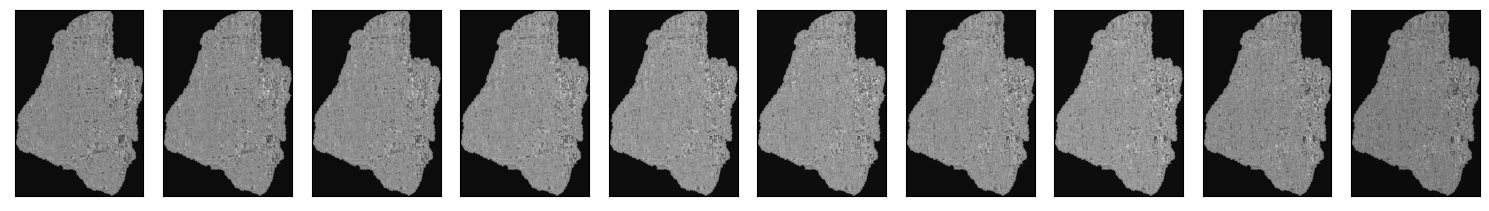

(65, 7606, 5249)

In [2]:
volume = np.stack([np.array(Image.open(filename), dtype=np.float32)/65535.0 for filename in tqdm(sorted(glob.glob(PREFIX+f"/{data_id}/surface_volume/*.tif")))])
# image_stack = torch.stack([torch.from_numpy(image) for image in images], dim=0).to(DEVICE)

fig, axes = plt.subplots(1, len(volume[:10]), figsize=(15, 3))
for image, ax in zip(volume[:10], axes):
  ax.imshow(np.array(Image.fromarray(image).resize((image.shape[1]//20, image.shape[0]//20)), dtype=np.float32), cmap='gray')
  ax.set_xticks([]); ax.set_yticks([])
fig.tight_layout()
plt.show()
volume.shape